## Important liprary imports

In [4]:
# Importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm
from keras.preprocessing import image
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam
from keras.regularizers import l1, l2

## Loading the labels data into dataframe and viewing the data.

In [5]:
# Read the labels.csv file and check shape and records
labels_all = pd.read_csv('./dogbreedidfromcomp/labels.csv')
print(labels_all.shape)
labels_all.head()

(10222, 2)


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [6]:
# Loading number or each breed
breed_all = labels_all['breed']
breed_count = breed_all.value_counts()
breed_count.head()

breed
scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
Name: count, dtype: int64

In [7]:
# Selecting all breeds because i have high computation power
CLASS_NAME = ['scottish_deerhound', 'maltese_dog', 'afghan_hound', 'entlebucher', 'bernese_mountain_dog']
labels = labels_all[(labels_all['breed'].isin(CLASS_NAME))]
labels = labels.reset_index()
labels.head()

,index,id,breed
0,9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound
1,12,00693b8bc2470375cc744a6391d397ec,maltese_dog
2,79,01e787576c003930f96c966f9c3e1d44,scottish_deerhound
3,80,01ee3c7ff9bcaba9874183135877670e,entlebucher
4,88,021b5a49189665c0442c19b5b33e8cf1,entlebucher


In [8]:
# Creating numpy matrix with zeros
X_data = np.zeros((len(labels), 224, 224, 3), dtype='float32')
# One hot encoding
Y_data = label_binarize(labels['breed'], classes = CLASS_NAME)

# Reading and converting image to numpy array and normalizing dataset
for i in tqdm(range(len(labels))):
    img = image.load_img('./dogbreedidfromcomp/train/%s.jpg' % labels['id'][i], target_size=(224, 224))
    img = image.img_to_array(img)
    x = np.expand_dims(img.copy(), axis=0)
    X_data[i] = x / 255.0

# Printing train image and one hot encode shape & size
print('\nTrain Images shape: ',X_data.shape,' size: {:,}'.format(X_data.size))
print('One-hot encoded output shape: ',Y_data.shape,' size: {:,}'.format(Y_data.size))

  3%|▎         | 18/588 [00:00<00:03, 179.87it/s]

100%|██████████| 588/588 [00:03<00:00, 186.66it/s]


Train Images shape:  (588, 224, 224, 3)  size: 88,510,464
One-hot encoded output shape:  (588, 5)  size: 2,940


#### Next we will create a network architecture for the model. We have used different types of layers according to their features namely Conv_2d (It is used to create a convolutional kernel that is convolved with the input layer to produce the output tensor), max_pooling2d (It is a downsampling technique which takes out the maximum value over the window defined by poolsize), flatten (It flattens the input and creates a 1D output), Dense (Dense layer produce the output as the dot product of input and kernel).

In [9]:
# Building the Model
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (5,5), activation ='relu', input_shape = (224,224,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 16, kernel_size = (7,7), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 8, kernel_size = (5,5), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation = "relu", kernel_regularizer = 'l2'))
model.add(Dense(64, activation = "relu", kernel_regularizer = 'l2'))
model.add(Dense(len(CLASS_NAME), activation = "softmax"))

model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001),metrics=['accuracy'])

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 64)      4864      
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 108, 108, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 16)        25104     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 24, 24, 16)       

After defining the network architecture we found out the total parameters as 162,619.

## After defining the network architecture we will start with splitting the test and train data then dividing train data in train and validation data. 

In [10]:
# Splitting the data set into training and testing data sets
X_train_and_val, X_test, Y_train_and_val, Y_test = train_test_split(X_data, Y_data, test_size = 0.1)
# Splitting the training data set into training and validation data sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train_and_val, Y_train_and_val, test_size = 0.2)

In [11]:
# Training the model
epochs = 20
batch_size = 84

history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, validation_data = (X_val, Y_val))

Epoch 1/20


6/6 [==============================] - 69s 9s/step - loss: 5.4019 - accuracy: 0.1915 - val_loss: 5.3588 - val_accuracy: 0.2264
Epoch 2/20
6/6 [==============================] - 41s 6s/step - loss: 5.3328 - accuracy: 0.1962 - val_loss: 5.2963 - val_accuracy: 0.2264
Epoch 3/20
6/6 [==============================] - 46s 7s/step - loss: 5.2698 - accuracy: 0.2411 - val_loss: 5.2364 - val_accuracy: 0.1887
Epoch 4/20
6/6 [==============================] - 25s 3s/step - loss: 5.2085 - accuracy: 0.2317 - val_loss: 5.1789 - val_accuracy: 0.2075
Epoch 5/20
6/6 [==============================] - 21s 4s/step - loss: 5.1465 - accuracy: 0.2293 - val_loss: 5.1240 - val_accuracy: 0.1887
Epoch 6/20
6/6 [==============================] - 20s 3s/step - loss: 5.0868 - accuracy: 0.2246 - val_loss: 5.0743 - val_accuracy: 0.1887
Epoch 7/20
6/6 [==============================] - 18s 3s/step - loss: 5.0289 - accuracy: 0.2246 - val_loss: 5.0217 - val_accuracy: 0.1887
Epoch 8/20
6/6 [================

## Here we analyse how the model is learning with each epoch in terms of accuracy.

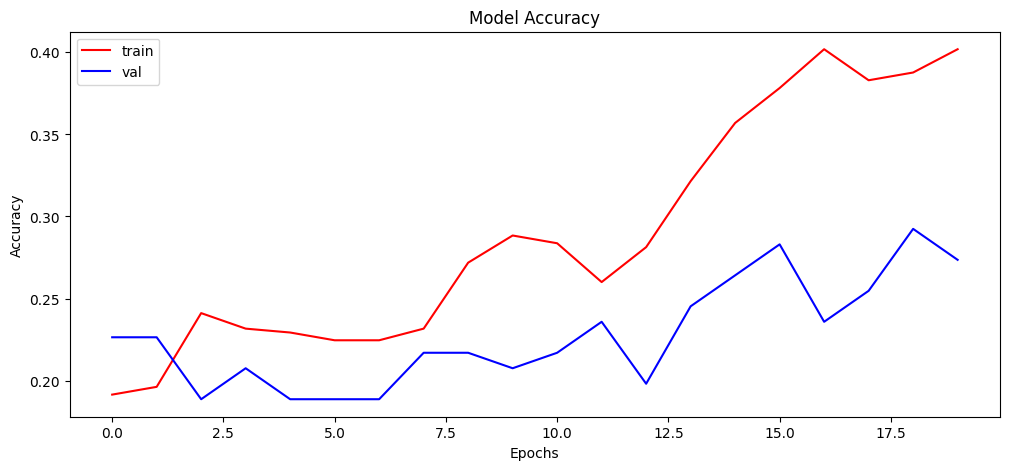

In [12]:
# Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

## We will use predict function to make predictions using this model also we are finding out the accuracy on the test set.

In [13]:
Y_pred = model.predict(X_test)
score = model.evaluate(X_test, Y_test)
print('Accuracy over the test set: \n ', round((score[1]*100), 2), '%')

2/2 [==============================] - 1s 232ms/step - loss: 4.2714 - accuracy: 0.3390
Accuracy over the test set: 
  33.9 %


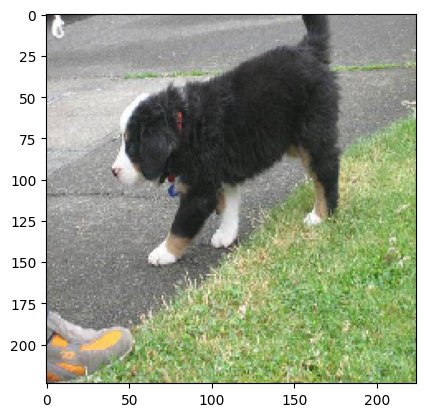

Originally :  entlebucher
Predicted :  scottish_deerhound


In [14]:
# Plotting image to compare
plt.imshow(X_test[1,:,:,:])
plt.show()

# Finding max value from predition list and comaparing original value vs predicted
print("Originally : ",labels['breed'][np.argmax(Y_test[1])])
print("Predicted : ",labels['breed'][np.argmax(Y_pred[1])])

In [15]:
# Save the first model
model.save('saved_models/model.h5')

C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Conclusion

We started with downloading the dataset creating the model and finding out the predictions using the model. We can optimize different hyper parameters in order to tune this model for a higher accuracy. This model can be used to predict different breeds of dogs which can be further used by different NGO's working on saving animals and for educational purposes also.

In [16]:
# Building the Model with Regularization
model_optimized = Sequential()

# Add Conv2D layers with L1 regularization
model_optimized.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu', input_shape=(224,224,3), kernel_regularizer=l1(0.01)))
model_optimized.add(MaxPool2D(pool_size=(2,2)))

# Add Conv2D layers with L2 regularization
model_optimized.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', kernel_regularizer=l2(0.01)))
model_optimized.add(MaxPool2D(pool_size=(2,2)))

# Add Conv2D layers with L1 regularization
model_optimized.add(Conv2D(filters=16, kernel_size=(7,7), activation='relu', kernel_regularizer=l1(0.01)))
model_optimized.add(MaxPool2D(pool_size=(2,2)))

# Add Conv2D layers with L2 regularization
model_optimized.add(Conv2D(filters=8, kernel_size=(5,5), activation='relu', kernel_regularizer=l2(0.01)))
model_optimized.add(MaxPool2D(pool_size=(2,2)))

# Add Dense layers with L1 regularization
model_optimized.add(Flatten())
model_optimized.add(Dense(128, activation="relu", kernel_regularizer=l1(0.01)))
model_optimized.add(Dense(64, activation="relu", kernel_regularizer=l1(0.01)))
model_optimized.add(Dense(len(CLASS_NAME), activation="softmax"))

# Compile the model with the same loss function and optimizer
model_optimized.compile(loss='categorical_crossentropy', optimizer=Adam(0.0001), metrics=['accuracy'])

In [17]:
# Train the model with the same parameters as before
history_optimized = model_optimized.fit(X_train, Y_train, batch_size=64, epochs=epochs, validation_data=(X_val, Y_val))

Epoch 1/20
7/7 [==============================] - 43s 3s/step - loss: 57.8362 - accuracy: 0.1844 - val_loss: 57.2518 - val_accuracy: 0.2170
Epoch 2/20
7/7 [==============================] - 15s 2s/step - loss: 56.8576 - accuracy: 0.1749 - val_loss: 56.2777 - val_accuracy: 0.2453
Epoch 3/20
7/7 [==============================] - 14s 2s/step - loss: 55.8889 - accuracy: 0.2128 - val_loss: 55.3136 - val_accuracy: 0.2642
Epoch 4/20
7/7 [==============================] - 14s 2s/step - loss: 54.9284 - accuracy: 0.2270 - val_loss: 54.3601 - val_accuracy: 0.2642
Epoch 5/20
7/7 [==============================] - 13s 2s/step - loss: 53.9780 - accuracy: 0.2317 - val_loss: 53.4157 - val_accuracy: 0.2642
Epoch 6/20
7/7 [==============================] - 13s 2s/step - loss: 53.0365 - accuracy: 0.2553 - val_loss: 52.4794 - val_accuracy: 0.3019
Epoch 7/20
7/7 [==============================] - 13s 2s/step - loss: 52.1042 - accuracy: 0.2506 - val_loss: 51.5530 - val_accuracy: 0.2642
Epoch 8/20
7/7 [====

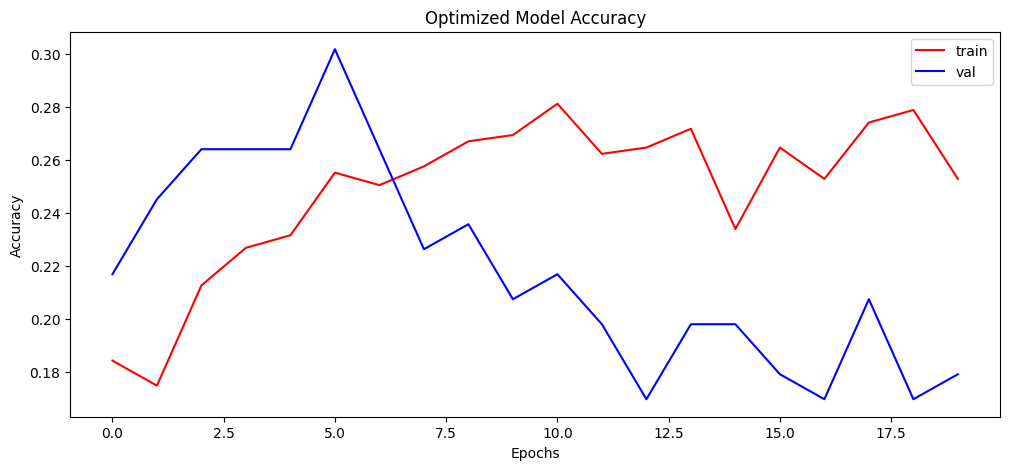

In [18]:
# Plot the training history for the optimized model
plt.figure(figsize=(12,  5))
plt.plot(history_optimized.history['accuracy'], color='r')
plt.plot(history_optimized.history['val_accuracy'], color='b')
plt.title('Optimized Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

In [19]:
# Make predictions using the optimized model
Y_pred_optimized = model_optimized.predict(X_test)
score_optimized = model_optimized.evaluate(X_test, Y_test)
print('Accuracy over the test set for optimized model: \n ', round((score_optimized[1]*100),  2), '%')

2/2 [==============================] - 1s 455ms/step - loss: 40.3462 - accuracy: 0.1864
Accuracy over the test set for optimized model: 
  18.64 %


In [20]:
# Save the optimized model
model_optimized.save('saved_models/model_optimized.h5')

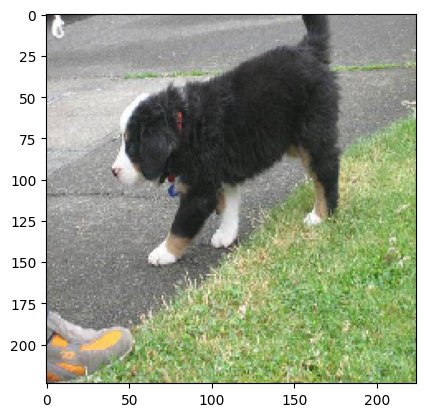

Original breed:  entlebucher
Predicted breed:  scottish_deerhound


In [21]:
# Plotting an image from the test set
plt.imshow(X_test[1,:,:,:])
plt.show()

# Finding the index of the maximum value from the prediction list
# and comparing the original value with the predicted value
print("Original breed: ", labels['breed'][np.argmax(Y_test[1])])
print("Predicted breed: ", labels['breed'][np.argmax(Y_pred_optimized[1])])
